In [3]:
import pandas as pd

# Importar el archivo CSV
df = pd.read_csv('data/m6_consumo_energia.csv')

# Asegurarse de que la columna de fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna de fecha como índice
df.set_index('Fecha', inplace=True)

# Rellenar huecos vacíos mediante interpolación
df.interpolate(method='linear', inplace=True)

# Mostrar las primeras filas para verificar
print(df.head())

            Energia Consumida  Temperatura  Humedad
Fecha                                              
2024-07-01             191.15       21.710   76.765
2024-07-02             185.83       21.969   73.388
2024-07-03             200.53       22.129   73.098
2024-07-04             197.76       22.161   75.965
2024-07-05             196.79       21.929   76.122


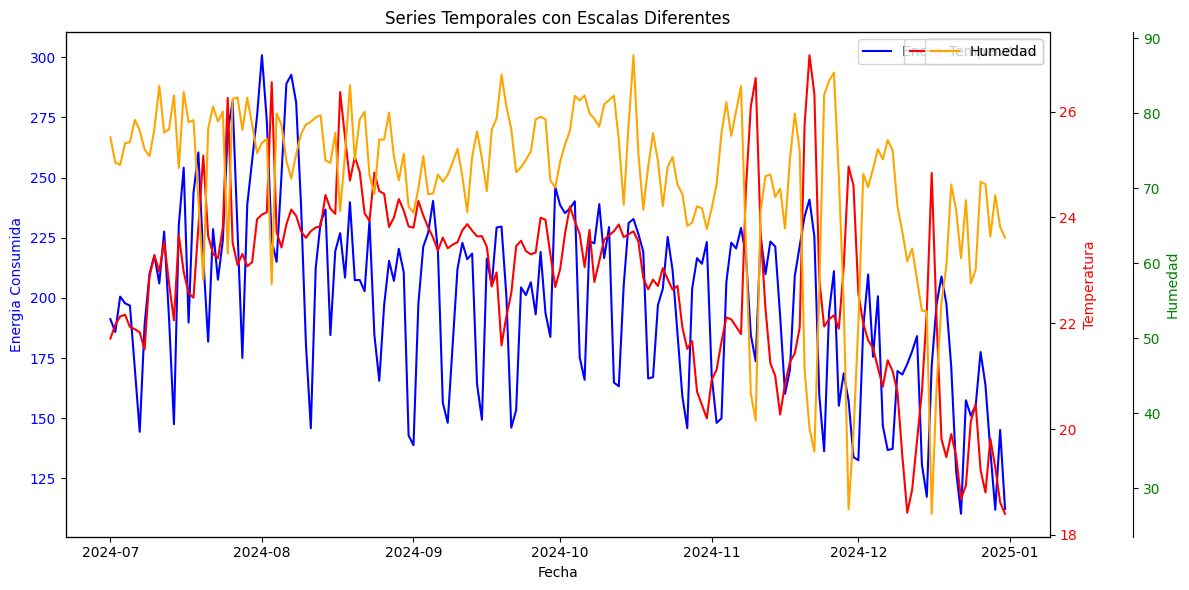

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la primera serie temporal (Energía Consumida)
sns.lineplot(data=df, x=df.index, y='Energia Consumida', ax=ax1, label='Energia Consumida', color='blue')
ax1.set_ylabel('Energia Consumida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la Temperatura
ax2 = ax1.twinx()
sns.lineplot(data=df, x=df.index, y='Temperatura', ax=ax2, label='Temperatura', color='red')
ax2.set_ylabel('Temperatura', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Crear un tercer eje y para la Humedad
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Desplazar el tercer eje
sns.lineplot(data=df, x=df.index, y='Humedad', ax=ax3, label='Humedad', color='orange')
ax3.set_ylabel('Humedad', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Título y leyenda
plt.title('Series Temporales con Escalas Diferentes')
fig.tight_layout()
plt.show()

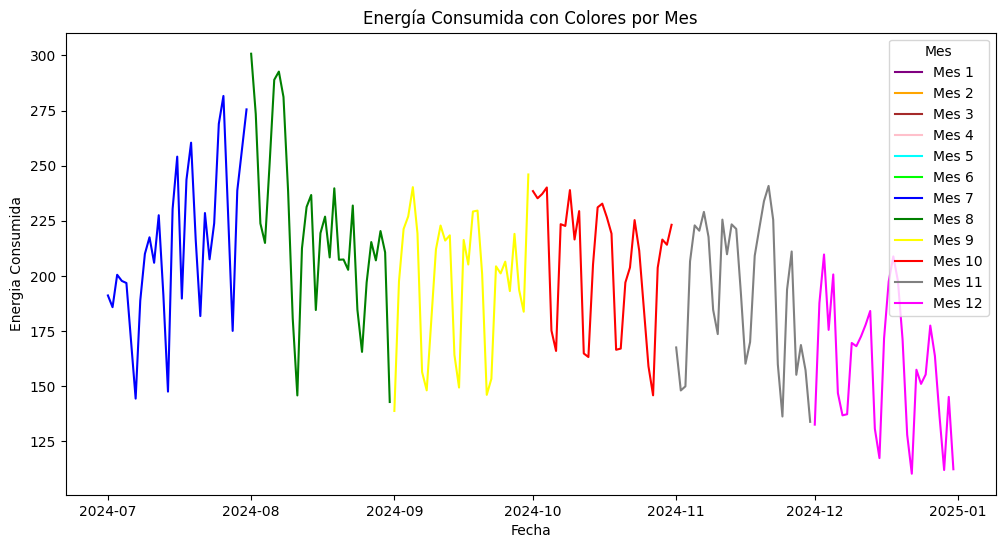

In [5]:
# Crear una columna con el mes
df['Mes'] = df.index.month

# Crear un mapa de colores para los meses
colores_mes = {
    1: 'purple', 2: 'orange', 3: 'brown', 4: 'pink', 5: 'cyan', 6: 'lime',
    7: 'blue', 8: 'green', 9: 'yellow', 10: 'red', 11: 'gray', 12: 'magenta'
}

# Crear la figura y los ejes nuevamente
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la energía consumida con colores por mes
for mes, color in colores_mes.items():
    datos_mes = df[df['Mes'] == mes]
    ax1.plot(datos_mes.index, datos_mes['Energia Consumida'], label=f'Mes {mes}', color=color)

ax1.set_ylabel('Energia Consumida')
ax1.set_xlabel('Fecha')
ax1.legend(title='Mes')
plt.title('Energía Consumida con Colores por Mes')
plt.show()

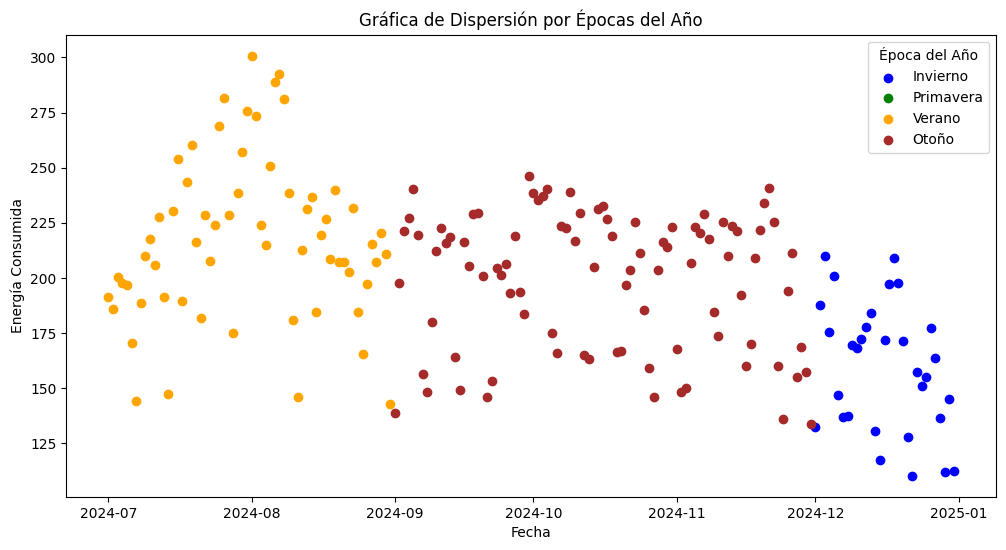

In [6]:
# Definir las estaciones del año
def obtener_epoca(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Crear una nueva columna para las épocas del año
df['Epoca'] = df['Mes'].apply(obtener_epoca)

# Asignar colores a cada época
colores_epoca = {
    'Invierno': 'blue',
    'Primavera': 'green',
    'Verano': 'orange',
    'Otoño': 'brown'
}

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada época con un color diferente
for epoca, color in colores_epoca.items():
    datos_epoca = df[df['Epoca'] == epoca]
    ax.scatter(datos_epoca.index, datos_epoca['Energia Consumida'], label=epoca, color=color)

# Configurar etiquetas y título
ax.set_ylabel('Energía Consumida')
ax.set_xlabel('Fecha')
ax.legend(title='Época del Año')
plt.title('Gráfica de Dispersión por Épocas del Año')
plt.show()

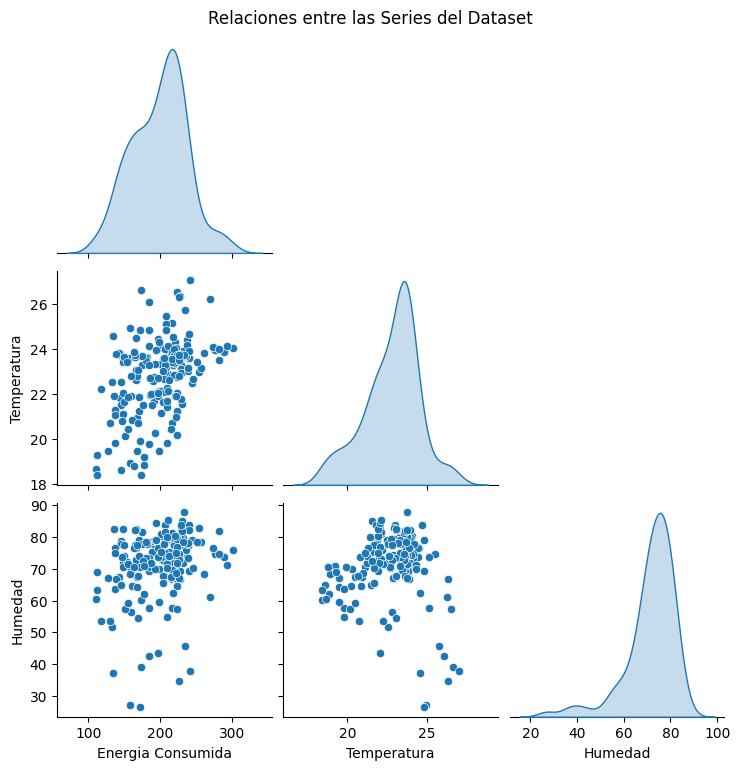

In [7]:
# Crear un jointplot para visualizar las relaciones entre las variables
sns.pairplot(df[['Energia Consumida', 'Temperatura', 'Humedad']], diag_kind='kde', kind='scatter', corner=True)

# Título para la gráfica
plt.suptitle('Relaciones entre las Series del Dataset', y=1.02)
plt.show()

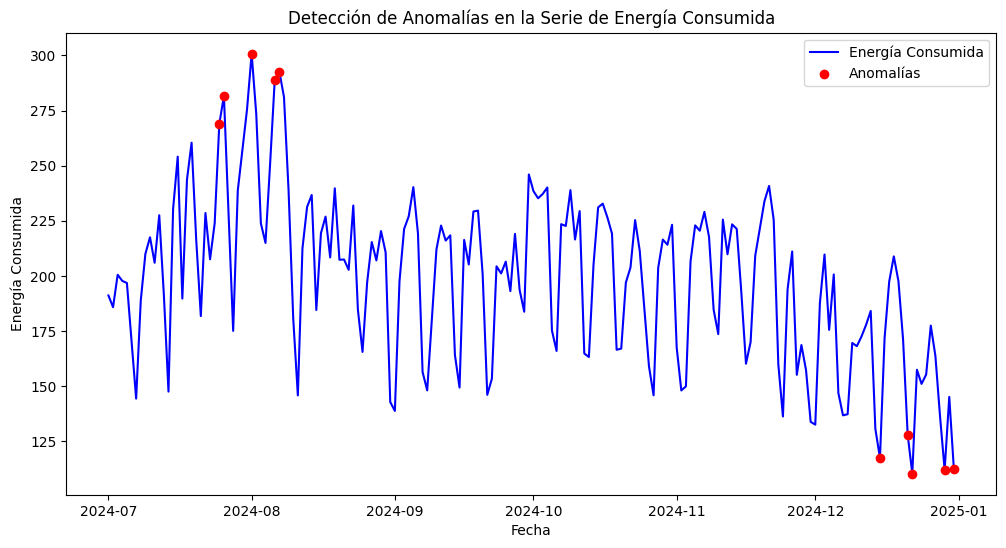

In [9]:
from sklearn.ensemble import IsolationForest

# Crear el modelo de Isolation Forest
modelo = IsolationForest(contamination=0.05, random_state=42)

# Ajustar el modelo a la serie de energía consumida
df['Anomalia'] = modelo.fit_predict(df[['Energia Consumida']])

# Identificar las anomalías
df['Es_Anomalia'] = df['Anomalia'] == -1

# Graficar la serie temporal con las anomalías marcadas
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Energia Consumida'], label='Energía Consumida', color='blue')
plt.scatter(df[df['Es_Anomalia']].index, df[df['Es_Anomalia']]['Energia Consumida'], 
            color='red', label='Anomalías', zorder=5)
plt.xlabel('Fecha')
plt.ylabel('Energía Consumida')
plt.title('Detección de Anomalías en la Serie de Energía Consumida')
plt.legend()
plt.show()